
# Steps to perform correction
## Prereq
1. Install Anaconda or Miniconda
2. Install the requirements inside a new env using the yaml file
3. Activate the env
Make sure all dependencies are installed
## Files Required
1. Dataset
2. image_correct.py
3. config_generator.py

In [43]:
# Step 1: import all the modules and libs
import hytools as ht
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Load the dataset
envi_image= 'output/neon'

anc_data = {'path_length': ['output/neon_155845_ancillary', 0],
 'sensor_az': ['output/neon_155845_ancillary', 1],
 'sensor_zn': ['output/neon_155845_ancillary', 2],
 'solar_az': ['output/neon_155845_ancillary', 3],
 'solar_zn': ['output/neon_155845_ancillary', 4],
 'phase': ['output/neon_155845_ancillary', 5],
 'slope': ['output/neon_155845_ancillary', 6],
 'aspect': ['output/neon_155845_ancillary', 7],
 'cosine_i': ['output/neon_155845_ancillary', 8],
}
envi = ht.HyTools()
envi.read_file(envi_image,'envi',anc_path=anc_data)

In [45]:
# Generate the config json


In [46]:
# Topo Correction
# Loading the coeff
topo_coeffs = 'export/neon_topo_coeffs__corrected_0.json'
envi.load_coeffs(topo_coeffs,'topo')

brdf_coeffs = 'export/neon_brdf_coeffs__corrected_0.json'
envi.load_coeffs(brdf_coeffs,'brdf')


In [47]:
# Function for reading from and displaying a RGB image preview 
def show_rgb(hy_obj,r=660,g=550,b=440, correct= []):

    rgb=  np.stack([hy_obj.get_wave(r,corrections= correct),
                    hy_obj.get_wave(g,corrections= correct),
                    hy_obj.get_wave(b,corrections= correct)])
    rgb = np.moveaxis(rgb,0,-1).astype(float)
    rgb[rgb ==hy_obj.no_data] = np.nan

    bottom = np.nanpercentile(rgb,5,axis = (0,1))
    top = np.nanpercentile(rgb,95,axis = (0,1))
    rgb = np.clip(rgb,bottom,top)

    rgb = (rgb-np.nanmin(rgb,axis=(0,1)))/(np.nanmax(rgb,axis= (0,1))-np.nanmin(rgb,axis= (0,1)))

    height = int(hy_obj.lines/hy_obj.columns)

    fig  = plt.figure(figsize = (7,7) )
    plt.imshow(rgb)
    plt.show()
    plt.close()

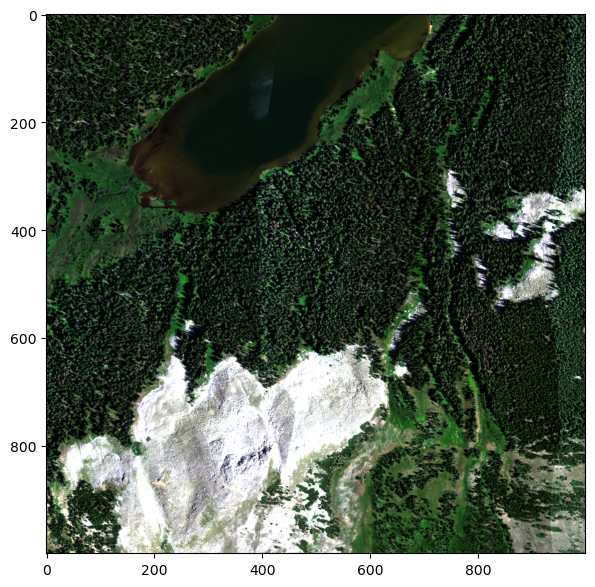

In [48]:
# Before Topo Correction
show_rgb(envi, correct= [])

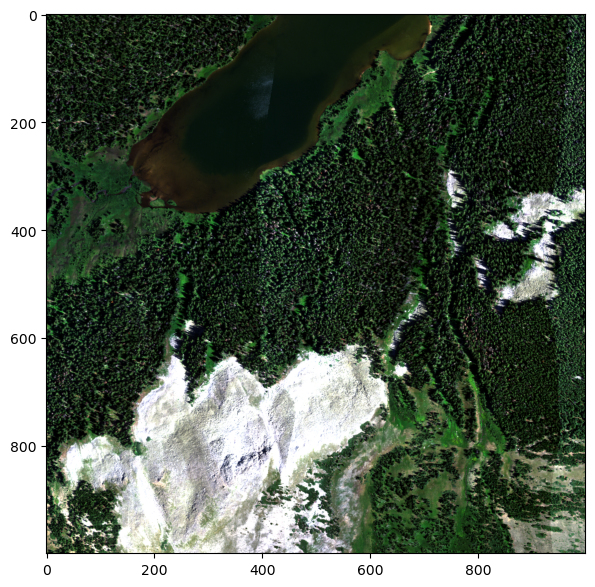

In [49]:
# After Topo Correction
show_rgb(envi, correct = ['topo'])

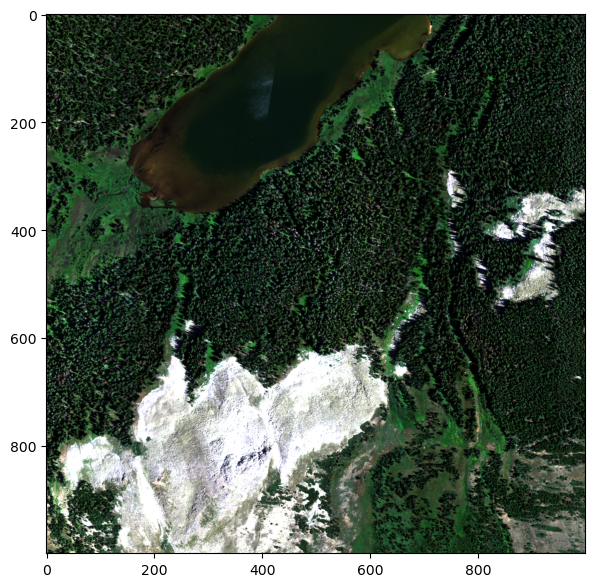

In [50]:
show_rgb(envi, correct = ['brdf'])

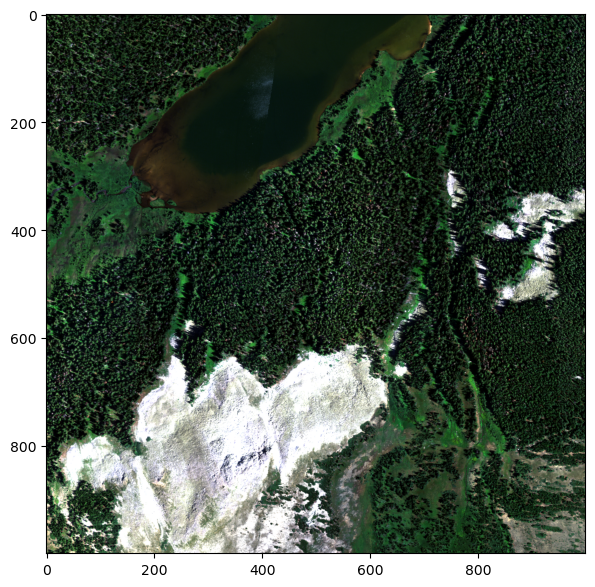

In [51]:
show_rgb(envi, correct = ['topo','brdf'])


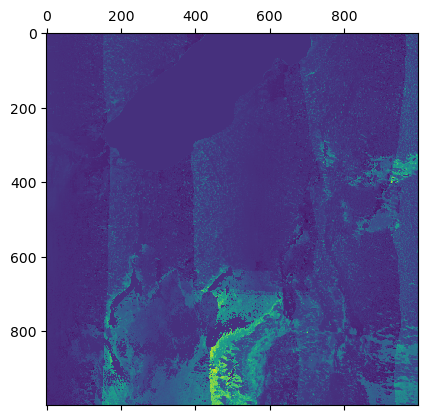

In [52]:
difference = envi.get_wave(450) - envi.get_wave(450,corrections= ['topo',
                                                                  'brdf'])
plt.matshow(difference)

In [41]:
# def plot_direct_comparison(hy_obj):
#     # Extracting data using the function calls as in the notebook
#     before_vals = extract_rgb_data(hy_obj, correct=[]).flatten()
#     after_vals = extract_rgb_data(hy_obj, correct=['topo']).flatten()
    
#     # Create scatter plot
#     plt.figure(figsize=(7, 7))
#     plt.scatter(before_vals, after_vals, s=1, alpha=0.5)
#     plt.title('Comparison Before and After Topo Correction')
#     plt.xlabel('Before Correction')
#     plt.ylabel('After Correction')
#     plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='r', linestyle='--')
#     plt.tight_layout()
#     plt.show()

In [42]:
# plot_direct_comparison(envi)
